# Grid Extension

In [26]:
import torch
from torch_kan import KANLayer
import matplotlib.pyplot as plt
from torch import nn

In [27]:
nCps1 = 9
nCps2 = 18
B = 86
k = 2
inDim, outDim = 8, 52
nEval = 150
cps1 = torch.randn(inDim, outDim, nCps1)
x = torch.linspace(-1, 1, nEval).unsqueeze(0).unsqueeze(0).expand(B, inDim, -1)

kan1 = KANLayer(inDim, outDim, k, nCps1)
kan2 = KANLayer(inDim, outDim, k, nCps2)

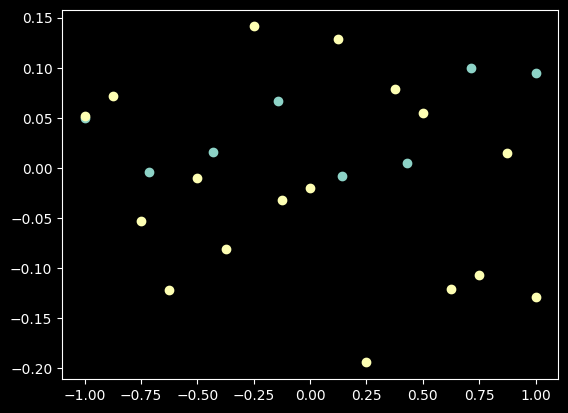

In [28]:
# Checking that controls points are different for both layers
plt.scatter(kan1.splines.t[k:-k].detach(), kan1.cps[1, 2, :-1].detach())
plt.scatter(kan2.splines.t[k:-k].detach(), kan2.cps[1, 2, :-1].detach())

In [29]:
# Proceeding to least square fitting
x = torch.linspace(-1, 1, nEval).unsqueeze(0).unsqueeze(0).expand(-1, inDim, -1)
A = kan2.splines._bSplines(x)  # (B, inDim, nEval, nCps)
B = kan1.splines(x, kan1.cps)  # (B, inDim, outDim, nEval).
newCps = torch.linalg.lstsq(A, B.moveaxis(-2, -1)).solution.moveaxis(-2, -1).squeeze(0)
kan2.cps = nn.Parameter(newCps)

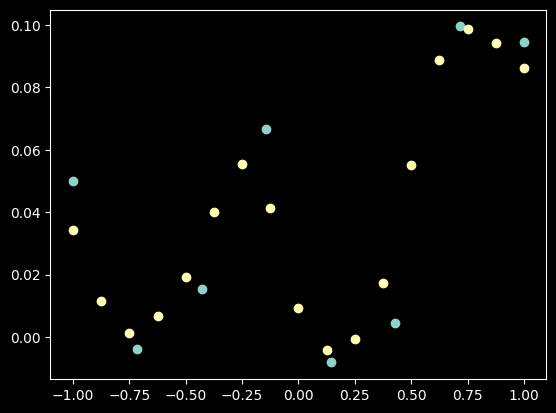

In [30]:
# Check that points are now closer
plt.scatter(kan1.splines.t[k:-k].detach(), kan1.cps[1, 2, :-1].detach())
plt.scatter(kan2.splines.t[k:-k].detach(), kan2.cps[1, 2, :-1].detach())